In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc

In [2]:
INPUT_DIR = '../../input/m5-forecasting-accuracy'

In [4]:
sales=pd.read_csv(f'{INPUT_DIR}/sales_train_evaluation.csv')

In [5]:
submission=pd.read_csv(f'{INPUT_DIR}/sample_submission.csv')

In [6]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [7]:
sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [8]:
item_list = sales['item_id'].unique().tolist()
state_list = ['CA','TX','WI']

In [9]:
sales[(sales['item_id']=='HOBBIES_1_001')&(sales['state_id']=='CA')].iloc[:,6:].sum()

d_1       0
d_2       0
d_3       0
d_4       0
d_5       0
         ..
d_1937    5
d_1938    4
d_1939    6
d_1940    3
d_1941    4
Length: 1941, dtype: int64

In [10]:
index_list = []
for state in state_list:
    for item in item_list:
        index_list.append(state+'_'+item)

In [11]:
len(index_list)

9147

In [13]:
df = pd.DataFrame(np.zeros([9147, 1941]), columns=['d_'+str(i+1) for i in range(1941)], index = index_list)

In [14]:
df.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
CA_HOBBIES_1_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA_HOBBIES_1_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA_HOBBIES_1_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA_HOBBIES_1_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA_HOBBIES_1_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
for state in state_list:
    for item in item_list:
        df.iloc[df.index==state+'_'+item,0:] = sales[(sales['item_id']==item)&(sales['state_id']==state)].iloc[:,6:].sum().values

In [16]:
df

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
CA_HOBBIES_1_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,10.0,5.0,2.0,3.0,5.0,4.0,6.0,3.0,4.0
CA_HOBBIES_1_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0
CA_HOBBIES_1_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,1.0,1.0,4.0,2.0,5.0,1.0,3.0
CA_HOBBIES_1_004,7.0,4.0,4.0,10.0,4.0,3.0,9.0,6.0,8.0,3.0,...,3.0,14.0,16.0,5.0,10.0,5.0,8.0,5.0,9.0,16.0
CA_HOBBIES_1_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,6.0,5.0,4.0,3.0,4.0,7.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WI_FOODS_3_823,0.0,0.0,2.0,2.0,0.0,3.0,1.0,4.0,1.0,0.0,...,3.0,1.0,6.0,0.0,4.0,1.0,2.0,1.0,3.0,4.0
WI_FOODS_3_824,2.0,0.0,0.0,0.0,1.0,7.0,0.0,3.0,2.0,3.0,...,1.0,1.0,1.0,4.0,0.0,0.0,5.0,3.0,1.0,1.0
WI_FOODS_3_825,1.0,9.0,1.0,4.0,2.0,7.0,1.0,9.0,5.0,2.0,...,10.0,3.0,18.0,9.0,3.0,4.0,4.0,6.0,3.0,13.0
WI_FOODS_3_826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,8.0,7.0,12.0,3.0,4.0,7.0,4.0,5.0


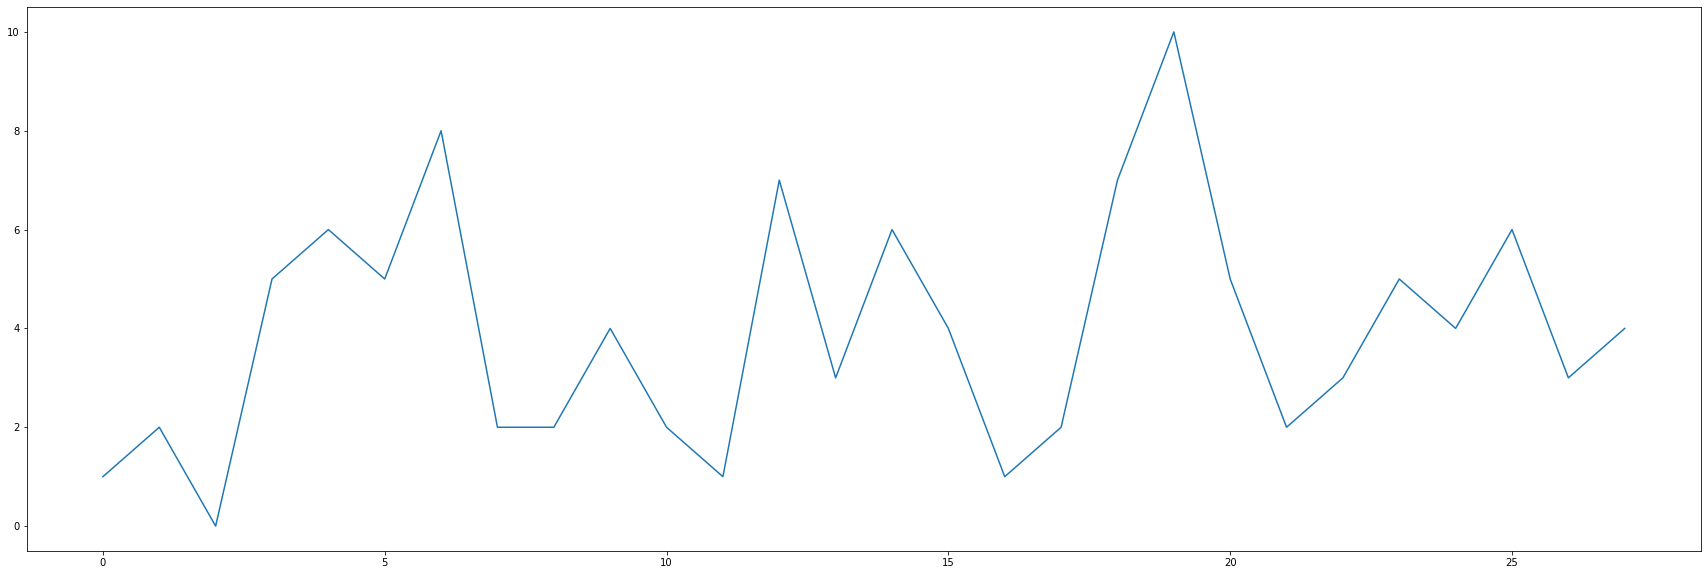

In [17]:
plt.figure(figsize=(30, 10))
plt.plot(df.iloc[0,(1941-28):].values)
plt.show()

In [18]:
df.iloc[:,1500:].T

,CA_HOBBIES_1_001,CA_HOBBIES_1_002,CA_HOBBIES_1_003,CA_HOBBIES_1_004,CA_HOBBIES_1_005,CA_HOBBIES_1_006,CA_HOBBIES_1_007,CA_HOBBIES_1_008,CA_HOBBIES_1_009,CA_HOBBIES_1_010,...,WI_FOODS_3_818,WI_FOODS_3_819,WI_FOODS_3_820,WI_FOODS_3_821,WI_FOODS_3_822,WI_FOODS_3_823,WI_FOODS_3_824,WI_FOODS_3_825,WI_FOODS_3_826,WI_FOODS_3_827
d_1501,3.0,2.0,0.0,22.0,4.0,3.0,1.0,21.0,4.0,2.0,...,7.0,9.0,9.0,1.0,10.0,2.0,2.0,3.0,0.0,0.0
d_1502,1.0,0.0,0.0,14.0,2.0,1.0,1.0,31.0,7.0,1.0,...,6.0,3.0,2.0,2.0,7.0,2.0,0.0,2.0,1.0,0.0
d_1503,2.0,0.0,0.0,9.0,5.0,4.0,1.0,26.0,2.0,0.0,...,5.0,5.0,4.0,0.0,12.0,3.0,1.0,5.0,0.0,2.0
d_1504,4.0,0.0,1.0,18.0,1.0,7.0,0.0,9.0,3.0,4.0,...,4.0,8.0,13.0,2.0,7.0,2.0,0.0,0.0,0.0,5.0
d_1505,1.0,1.0,1.0,12.0,2.0,3.0,0.0,18.0,0.0,2.0,...,6.0,8.0,6.0,2.0,5.0,4.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,5.0,0.0,4.0,5.0,3.0,1.0,1.0,19.0,1.0,2.0,...,16.0,10.0,8.0,1.0,7.0,1.0,0.0,4.0,3.0,0.0
d_1938,4.0,0.0,2.0,8.0,4.0,0.0,0.0,24.0,13.0,2.0,...,6.0,6.0,9.0,2.0,8.0,2.0,5.0,4.0,4.0,4.0
d_1939,6.0,2.0,5.0,5.0,7.0,7.0,1.0,15.0,8.0,0.0,...,3.0,12.0,10.0,6.0,11.0,1.0,3.0,6.0,7.0,10.0
d_1940,3.0,1.0,1.0,9.0,7.0,8.0,2.0,77.0,9.0,3.0,...,7.0,5.0,8.0,2.0,12.0,3.0,1.0,3.0,4.0,14.0


In [19]:
calendar = pd.read_csv(f'{INPUT_DIR}/calendar.csv')

In [28]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [21]:
cal_fea  = pd.read_csv(f'{INPUT_DIR}/cal_feat.csv')

In [22]:
cal_fea

,snap_CA,snap_TX,snap_WI,day_type
0,0,0,0,5
1,0,0,0,6
2,0,0,0,0
3,1,1,0,2
4,1,0,1,2
...,...,...,...,...
1964,0,1,1,2
1965,0,0,0,2
1966,0,0,0,4
1967,0,0,0,8


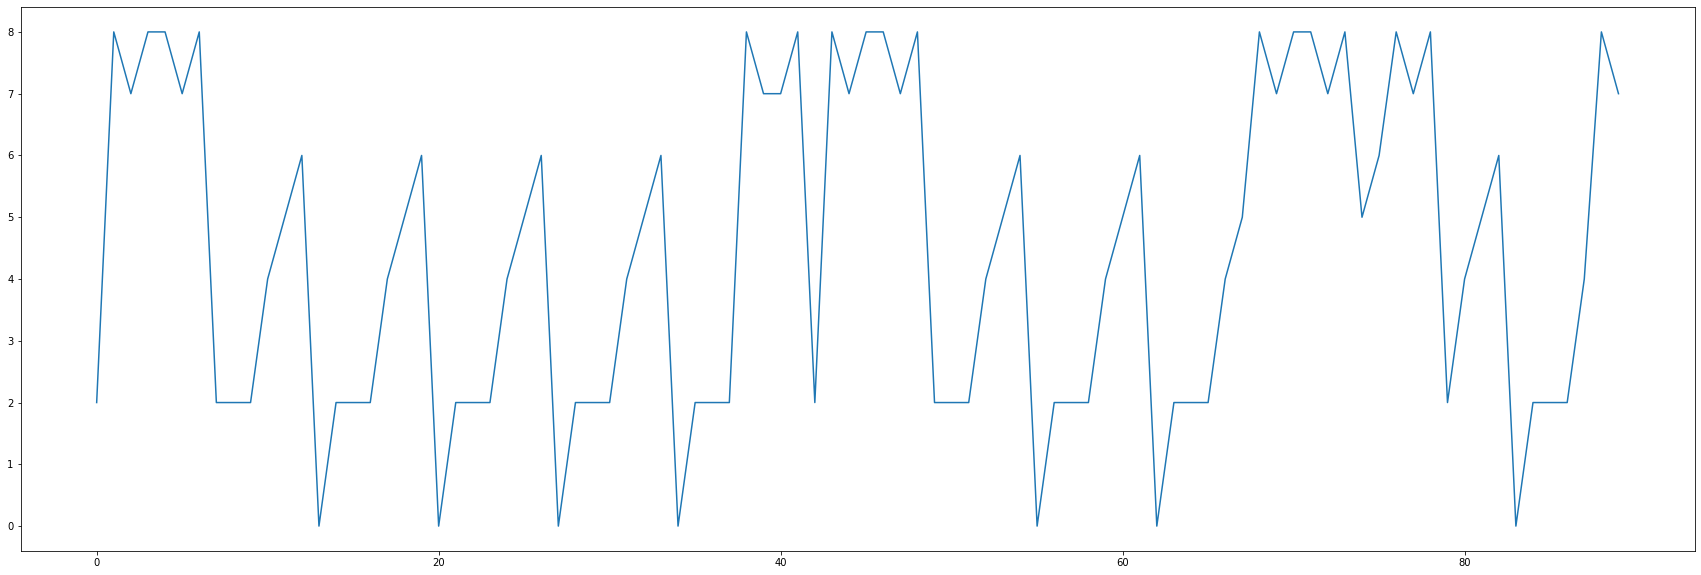

In [23]:
plt.figure(figsize=(30, 10))
plt.plot(cal_fea['day_type'][-90:].values)
plt.show()

In [24]:
calendar["date"] = pd.to_datetime(calendar["date"])

In [29]:
sample_df = pd.concat([calendar.loc[:1940,['date']], pd.DataFrame(df.T['CA_HOBBIES_1_001'].reset_index(drop=True))],axis=1)

In [30]:
sample_df = sample_df.rename({"date": "ds", "CA_HOBBIES_1_001": "y"}, axis=1)

In [31]:
sample_df

,ds,y
0,2011-01-29,0.0
1,2011-01-30,0.0
2,2011-01-31,0.0
3,2011-02-01,0.0
4,2011-02-02,0.0
...,...,...
1936,2016-05-18,5.0
1937,2016-05-19,4.0
1938,2016-05-20,6.0
1939,2016-05-21,3.0


In [32]:
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2011-02-06','2012-02-05','2013-02-03','2014-02-02', '2015-02-01', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

In [33]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2016-01-09','2016-01-10','2016-01-16','2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

In [34]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [35]:
NBA_days= []
for i,t in zip(calendar[calendar['event_name_1']=='NBAFinalsStart'].index.tolist(),calendar[calendar['event_name_1']=='NBAFinalsEnd'].index.tolist()):
    NBA_days.extend(pd.DatetimeIndex(calendar['date'].iloc[i:(t+1)]).tolist())
NBA_days = pd.DatetimeIndex(NBA_days)

NBA = pd.DataFrame({
  'holiday': 'NBA',
  'ds': NBA_days,
  'lower_window': 0,
  'upper_window': 1,
})
    

In [36]:
holidays = pd.concat([superbowls.loc[:,NBA.columns], playoffs.loc[:,NBA.columns],NBA.loc[:,NBA.columns]],axis=0)

In [37]:
model=Prophet(growth='logistic', seasonality_mode='multiplicative', holidays=holidays, weekly_seasonality=True, yearly_seasonality=False, daily_seasonality=False)
model.add_country_holidays(country_name='US')
train = sample_df.iloc[-112:-28]
train['cap'] = train['y'].max()*1.01
model.fit(train)

/Users/shukigoto/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [38]:
model.train_holiday_names

0                      superbowl
1                        playoff
2                            NBA
3                 New Year's Day
4     Martin Luther King Jr. Day
5          Washington's Birthday
6                   Memorial Day
7               Independence Day
8                      Labor Day
9                   Columbus Day
10                  Veterans Day
11                  Thanksgiving
12                 Christmas Day
13      Christmas Day (Observed)
dtype: object

In [39]:
future_df = model.make_future_dataframe(28)
future_df['cap'] = train['y'].max()*1.01

In [40]:
forecast_df = model.predict(future_df)

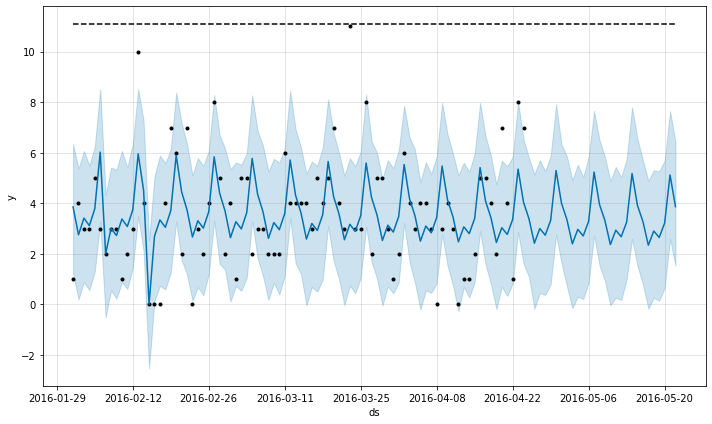

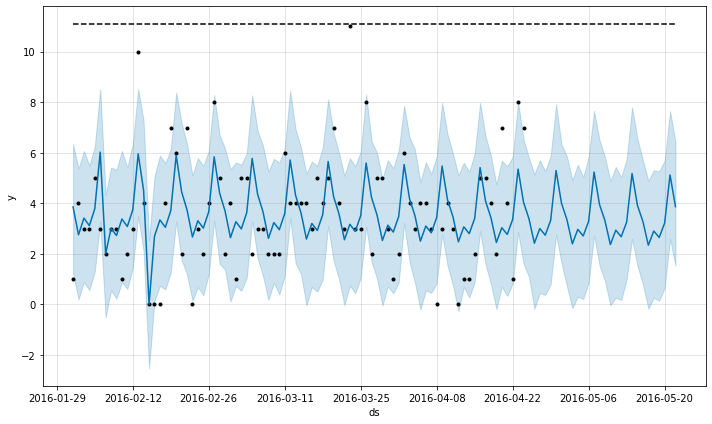

In [41]:
model.plot(forecast_df)

In [42]:
forecast_df

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,...,superbowl,superbowl_lower,superbowl_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2016-02-01,3.948544,11.11,1.236888,6.345459,3.948544,3.948544,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.022906,-0.022906,-0.022906,0.0,0.0,0.0,3.858097
1,2016-02-02,3.942714,11.11,0.196768,5.378614,3.942714,3.942714,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.301230,-0.301230,-0.301230,0.0,0.0,0.0,2.755051
2,2016-02-03,3.936888,11.11,0.878688,6.073592,3.936888,3.936888,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.132663,-0.132663,-0.132663,0.0,0.0,0.0,3.414610
3,2016-02-04,3.931066,11.11,0.569168,5.492927,3.931066,3.931066,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.207309,-0.207309,-0.207309,0.0,0.0,0.0,3.116121
4,2016-02-05,3.925247,11.11,1.298746,6.250133,3.925247,3.925247,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035830,-0.035830,-0.035830,0.0,0.0,0.0,3.784606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2016-05-18,3.348793,11.11,0.268166,5.307301,3.348793,3.348793,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.132663,-0.132663,-0.132663,0.0,0.0,0.0,2.904533
108,2016-05-19,3.343435,11.11,0.147089,5.267110,3.343435,3.343435,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.207309,-0.207309,-0.207309,0.0,0.0,0.0,2.650311
109,2016-05-20,3.338082,11.11,0.651484,5.690113,3.338082,3.338082,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.035830,-0.035830,-0.035830,0.0,0.0,0.0,3.218478
110,2016-05-21,3.332734,11.11,2.588422,7.647909,3.332734,3.332734,0.0,0.0,0.0,...,0.0,0.0,0.0,0.537357,0.537357,0.537357,0.0,0.0,0.0,5.123601


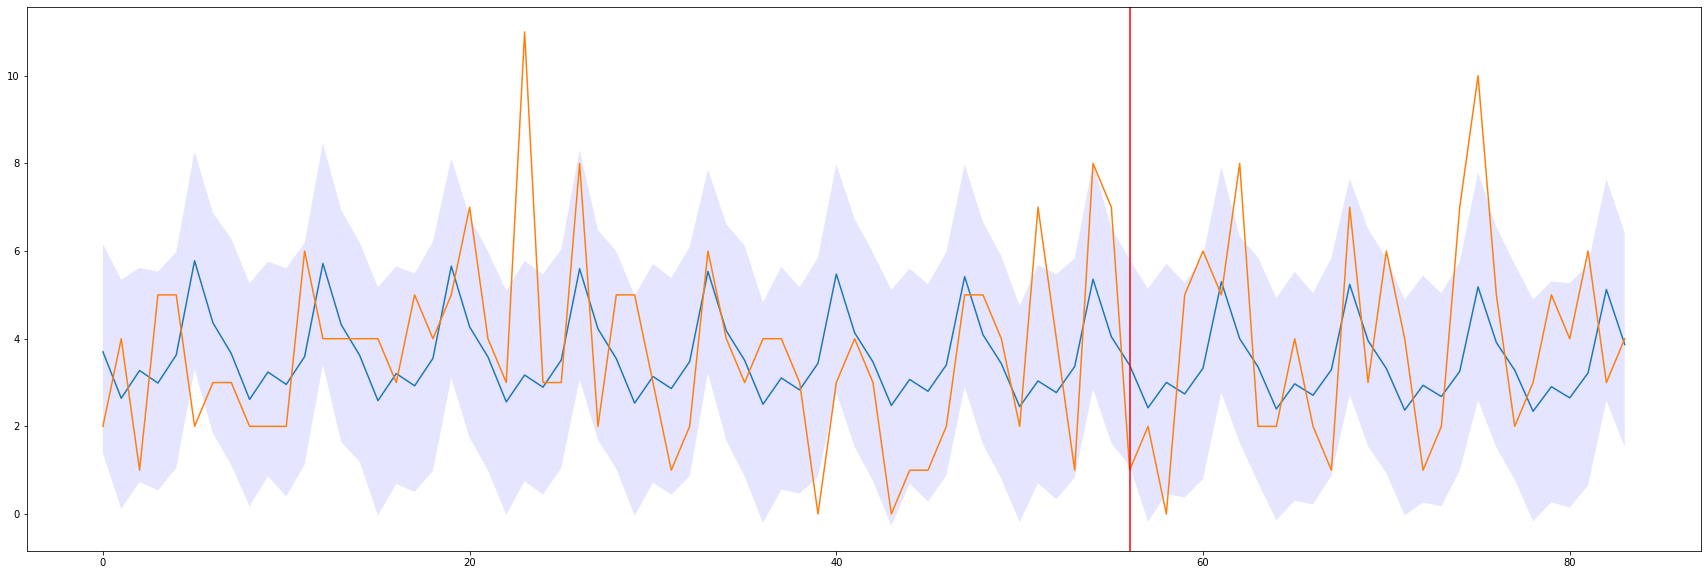

In [43]:
plt.figure(figsize=(30, 10))
plt.plot(forecast_df['yhat'][-84:].values)
plt.fill_between(np.arange(84),forecast_df['yhat_upper'][-84:].values,forecast_df['yhat_lower'][-84:].values,facecolor='b',alpha=0.1)
plt.plot(sample_df['y'].iloc[-84:].values)
plt.axvline(x=84-28, ymin=0, ymax=10,color='red')
plt.show()

In [44]:
sample_df

,ds,y
0,2011-01-29,0.0
1,2011-01-30,0.0
2,2011-01-31,0.0
3,2011-02-01,0.0
4,2011-02-02,0.0
...,...,...
1936,2016-05-18,5.0
1937,2016-05-19,4.0
1938,2016-05-20,6.0
1939,2016-05-21,3.0
